## Install modules

In [15]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.2 MB/s eta 0:00:00


In [16]:
import os
from google.colab import files
import zipfile
import yaml
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd
import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import shutil

shutil.rmtree('/content/drive/MyDrive/Colab Notebooks/runs')

## Mounting Drive

In [18]:
from google.colab import drive
from ultralytics import YOLO
drive.mount('/content/drive')

mon_dossier = '/content/drive/MyDrive/Colab Notebooks/datasets'

# Lister les fichiers
import os
print(os.listdir(mon_dossier))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['data.yaml', 'train', 'val', 'test']


## Entraînement

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
model_11 = YOLO("yolo11n.pt")
results_11 = model_11.train(
    data=mon_dossier+"/data.yaml",
    epochs=50,
    batch=2,
    imgsz=640,
    project='/content/drive/MyDrive/Colab Notebooks/runs/train_v11',
    name='entrainement_test_v11',
    augment=True
    )

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=2, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Colab Notebooks/datasets/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=entrainement_test_v11, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patien

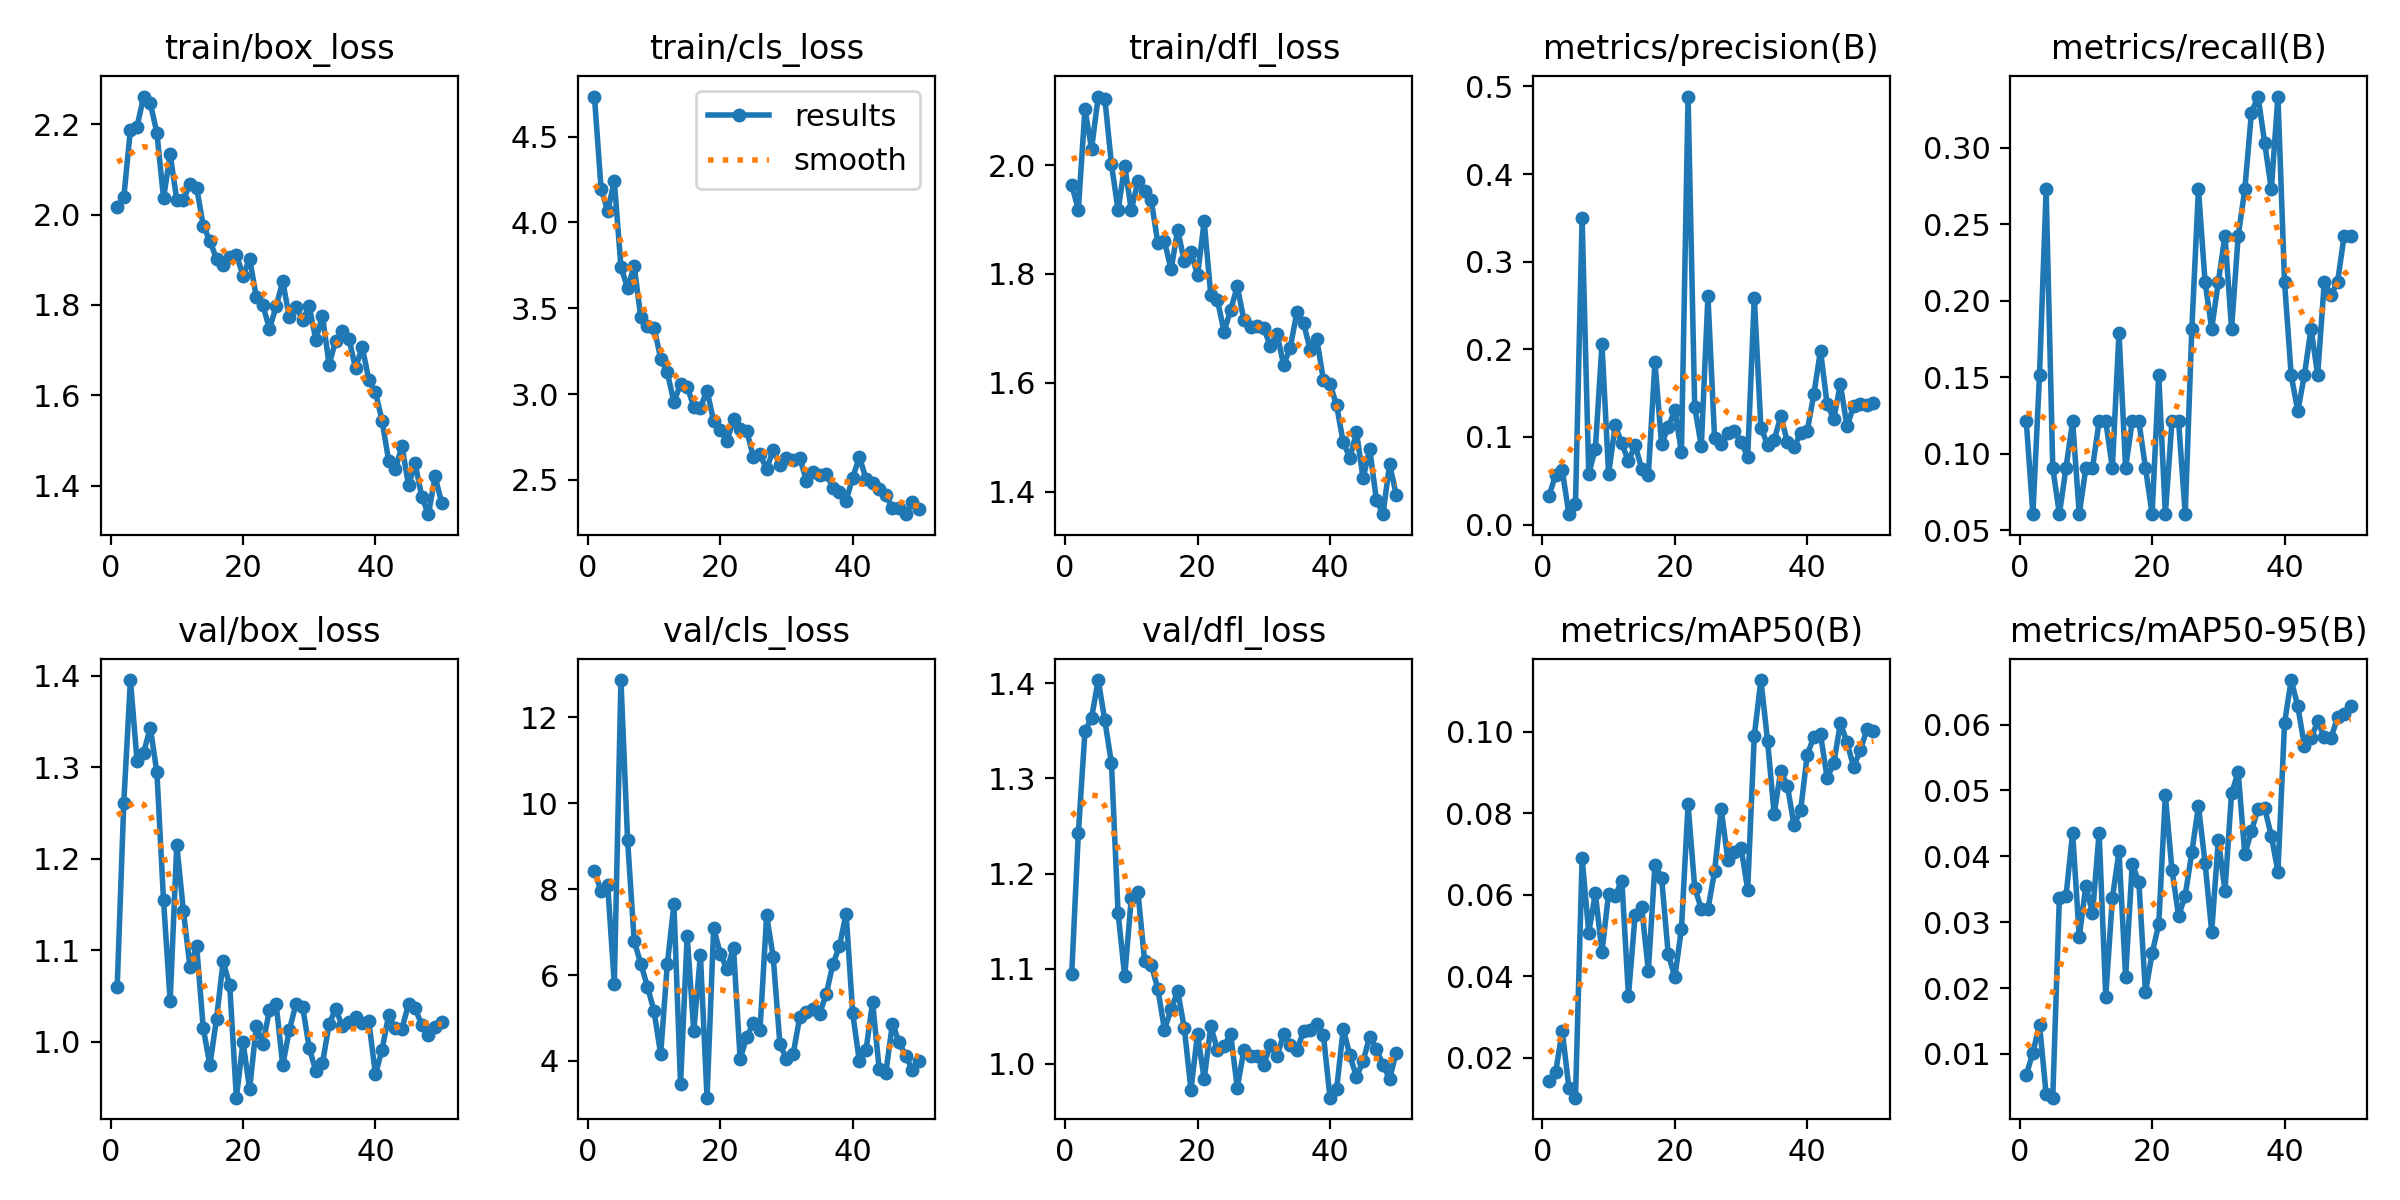

In [ ]:
from PIL import Image
from IPython.display import display

img = Image.open('/content/drive/MyDrive/Colab Notebooks/runs/train_v11/entrainement_test_v11/results.png')
display(img)

In [ ]:
model_8 = YOLO("yolov8n.pt")
results_8 = model_8.train(
    data=mon_dossier+"/data.yaml",
    epochs=50,
    batch=2,
    imgsz=640,
    project='/content/drive/MyDrive/Colab Notebooks/runs/train_v8',
    name='entrainement_test_v8')

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=2, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Colab Notebooks/datasets/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=entrainement_test_v8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patien

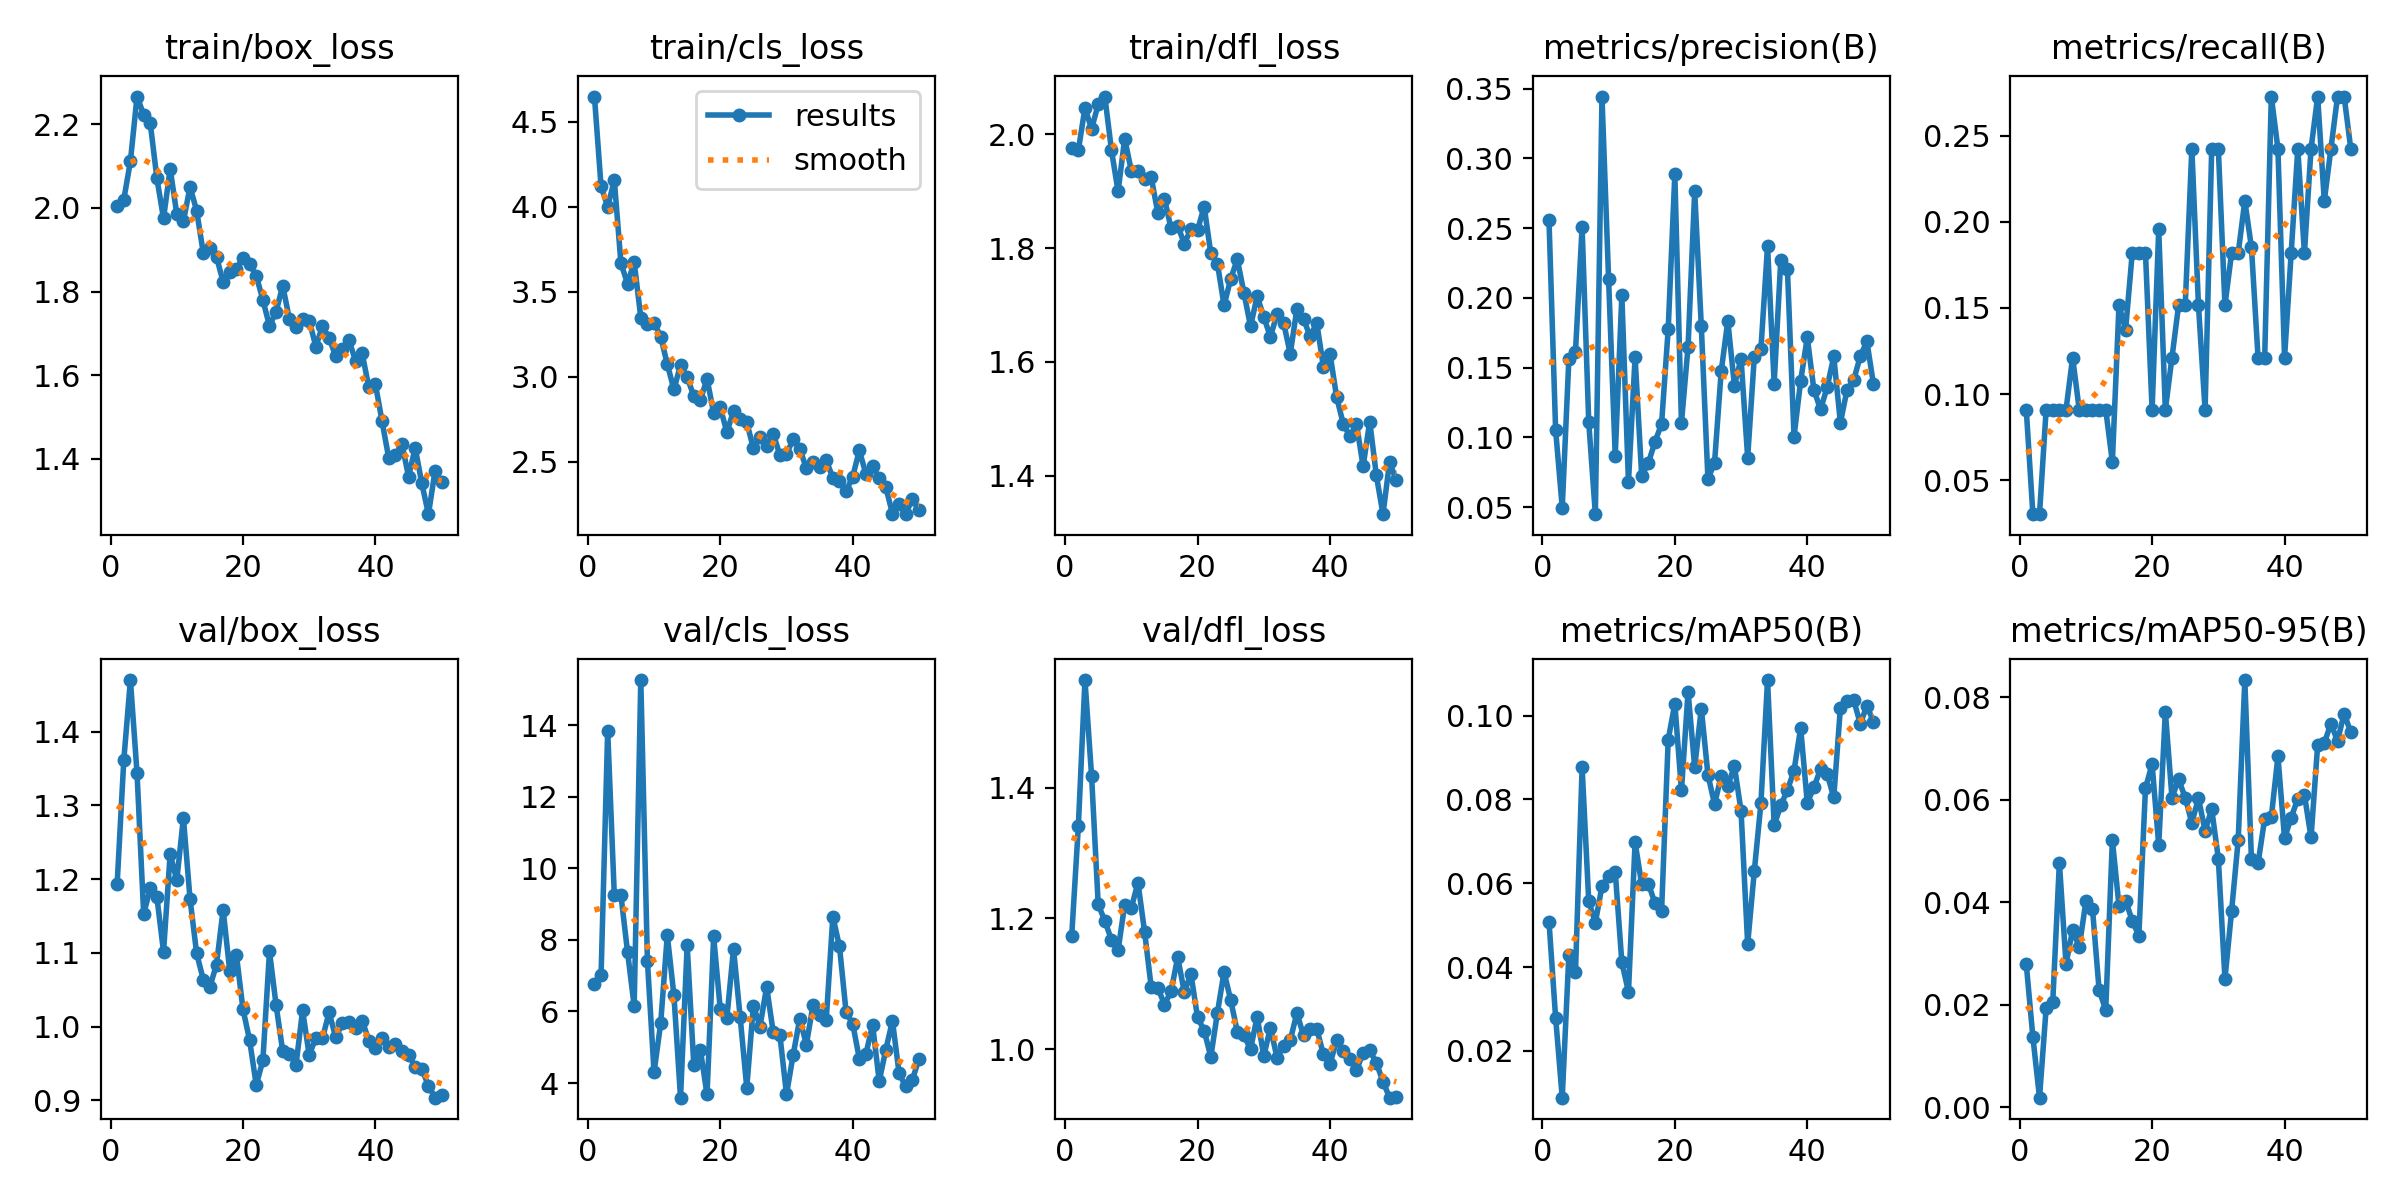

In [ ]:
from PIL import Image
from IPython.display import display

img = Image.open('/content/drive/MyDrive/Colab Notebooks/runs/train_v8/entrainement_test_v8/results.png')
display(img)

In [12]:
import pandas as pd

df_11 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/runs/train_v11/entrainement_test_v11/results.csv')

df_8 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/runs/train_v8/entrainement_test_v8/results.csv')

df_11['epoch_group'] = (df_11['epoch'] // 10) * 10
moyenne_par_tranche = df_11.groupby('epoch_group').mean(numeric_only=True)
print(moyenne_par_tranche)

['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']
             epoch         time  train/box_loss  train/cls_loss  \
epoch_group                                                       
0              5.0   143.669744        2.144523        3.908938   
10            14.5   353.646900        1.972053        3.048237   
20            24.5   574.267100        1.811739        2.705763   
30            34.5   796.947100        1.715331        2.524283   
40            44.5  1017.861800        1.450863        2.433979   
50            50.0  1137.700000        1.361720        2.331750   

             train/dfl_loss  metrics/precision(B)  metrics/recall(B)  \
epoch_group                                                            
0                  2.020110              0.098538           0.114480   
10       

In [13]:
df_8['epoch_group'] = (df_8['epoch'] // 10) * 10
moyenne_par_tranche = df_8.groupby('epoch_group').mean(numeric_only=True)
print(moyenne_par_tranche)

             epoch        time  train/box_loss  train/cls_loss  \
epoch_group                                                      
0              5.0   98.098678        2.107580        3.830903   
10            14.5  281.002100        1.920008        3.015467   
20            24.5  474.779400        1.783230        2.681003   
30            34.5  667.789000        1.665425        2.482053   
40            44.5  857.977400        1.407735        2.356325   
50            50.0  960.546000        1.343690        2.218430   

             train/dfl_loss  metrics/precision(B)  metrics/recall(B)  \
epoch_group                                                            
0                  1.998361              0.164363           0.080808   
10                 1.878012              0.126519           0.125869   
20                 1.759216              0.163959           0.152890   
30                 1.656248              0.162746           0.191258   
40                 1.467204            

On voit que les valeurs sont relativement similaires mais que le YOLOv8 va quand même légèrement mieux performer que le 11.

Quels hyper-paramètres peut-on faire varier pour essayer d’améliorer les performances ?

On peut augmenter le nombre d'epochs, augmenter le batchsize, augmenter l'image size ou bien baisser le learning rate.

In [19]:
model_8 = YOLO("yolov8n.pt")
results_8 = model_8.train(
    data=mon_dossier+"/data.yaml",
    epochs=60,
    batch=2,
    imgsz=864,
    lr0 = 0.01,
    project='/content/drive/MyDrive/Colab Notebooks/runs/train_v8_params',
    name='entrainement_test_v8')

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=2, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Colab Notebooks/datasets/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=860, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=entrainement_test_v8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patien

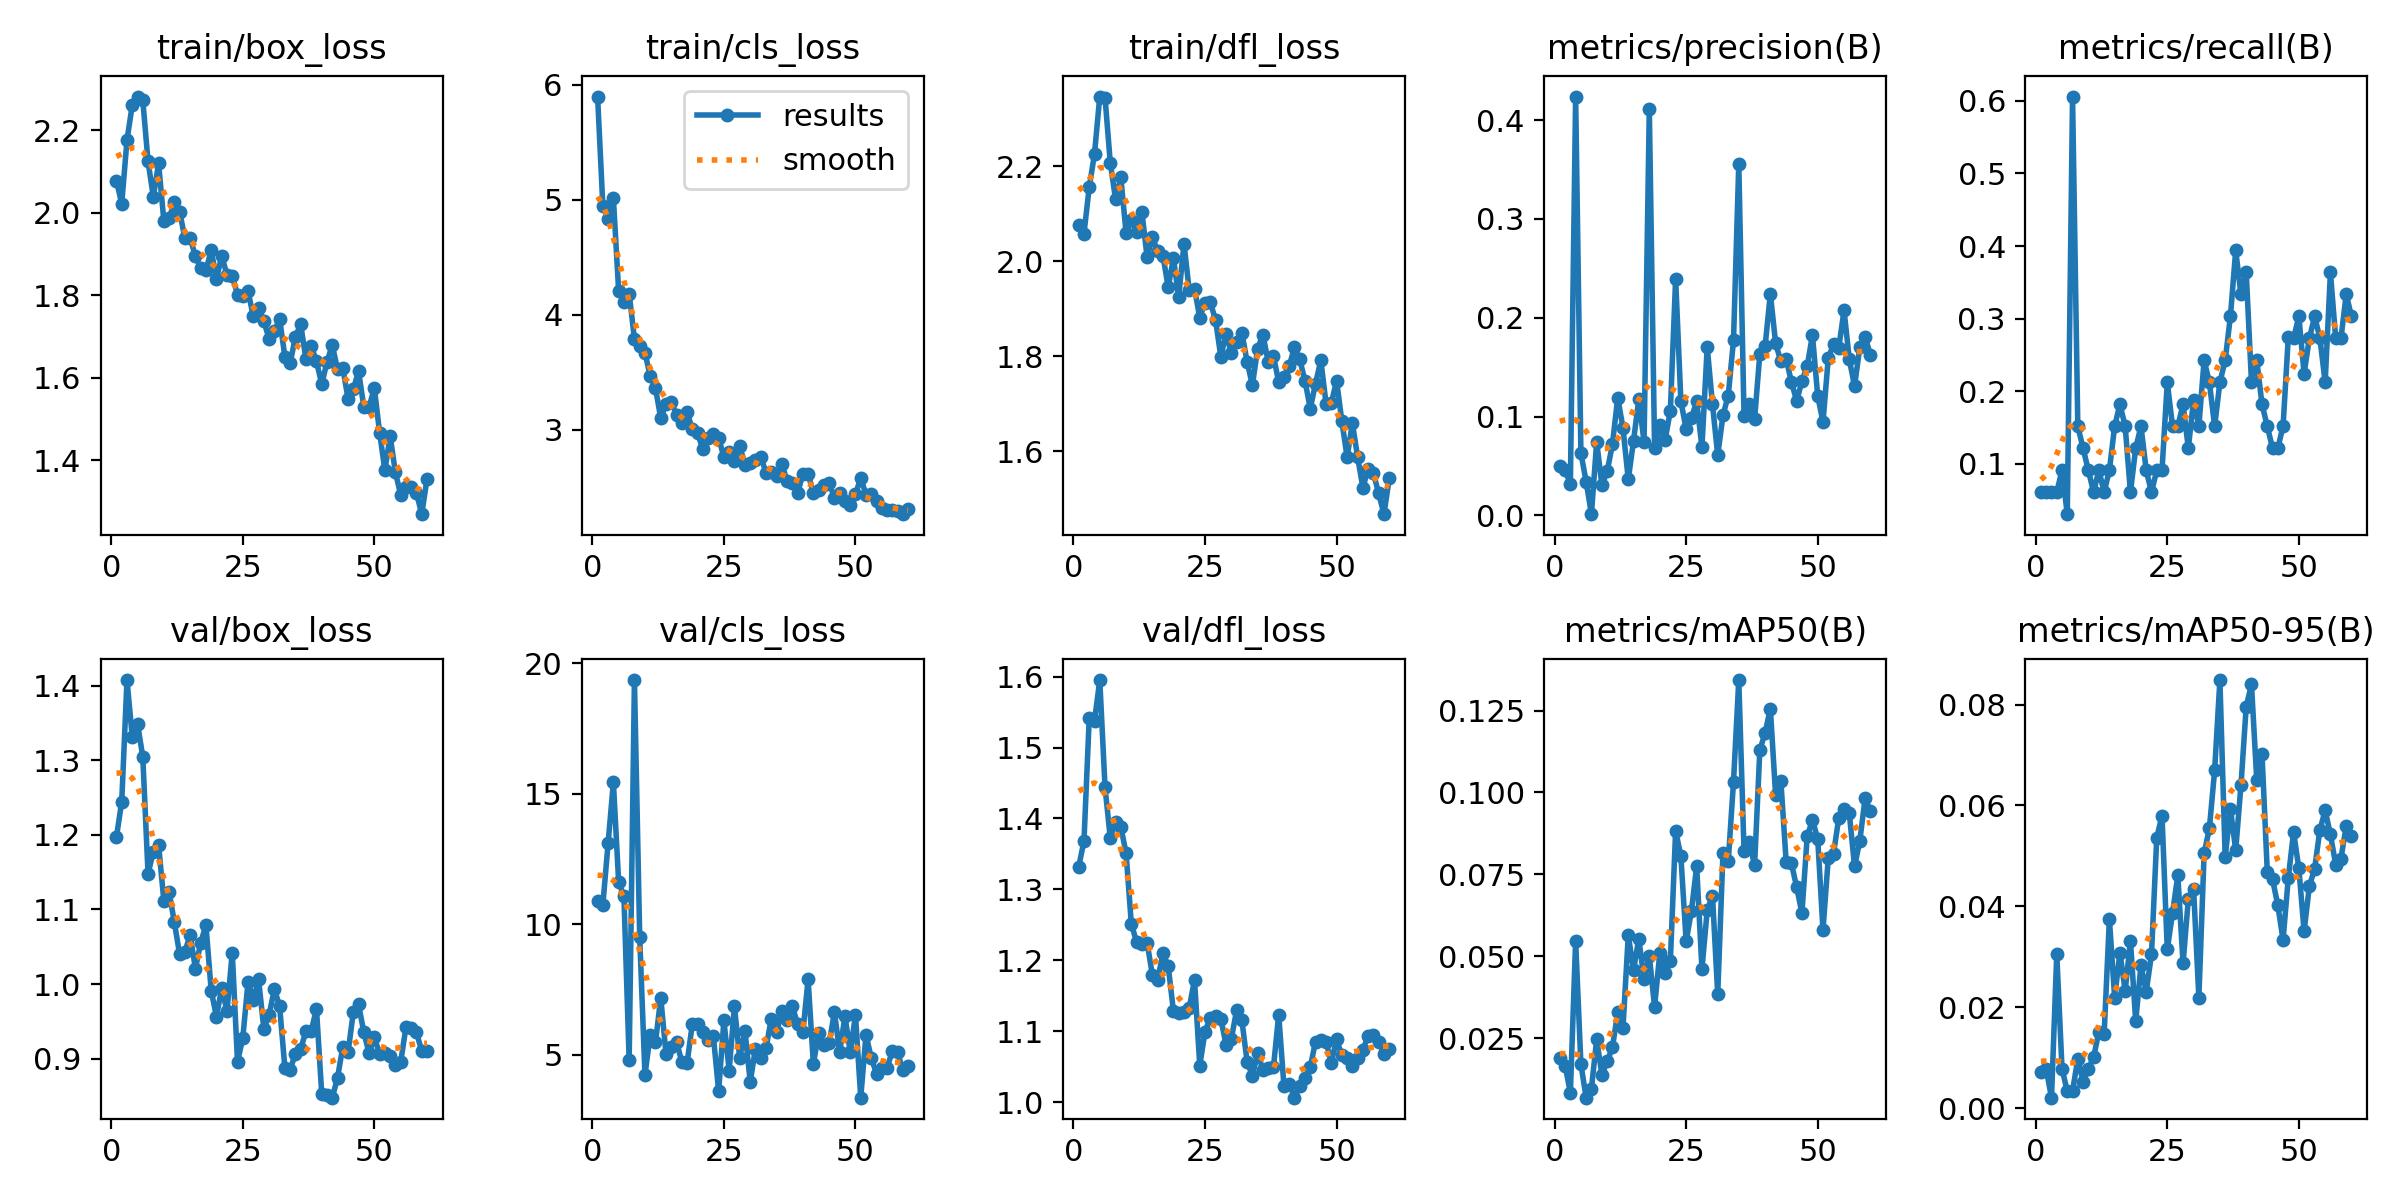

In [23]:
from PIL import Image
from IPython.display import display

img = Image.open('/content/drive/MyDrive/Colab Notebooks/runs/train_v8_params/entrainement_test_v8/results.png')
display(img)

In [26]:
df_8_params = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/runs/train_v8_params/entrainement_test_v8/results.csv')

In [27]:
df_8_params['epoch_group'] = (df_8_params['epoch'] // 10) * 10
moyenne_par_tranche = df_8_params.groupby('epoch_group').mean(numeric_only=True)
print(moyenne_par_tranche)

             epoch         time  train/box_loss  train/cls_loss  \
epoch_group                                                       
0              5.0   113.017211        2.152156        4.522250   
10            14.5   313.334100        1.940115        3.240932   
20            24.5   525.104700        1.809903        2.846926   
30            34.5   736.213300        1.682791        2.631561   
40            44.5   947.093200        1.594484        2.479794   
50            54.5  1156.146000        1.383180        2.375096   
60            60.0  1267.780000        1.354700        2.309190   

             train/dfl_loss  metrics/precision(B)  metrics/recall(B)  \
epoch_group                                                            
0                  2.190912              0.083731           0.138049   
10                 2.035186              0.110750           0.106063   
20                 1.907198              0.116878           0.130305   
30                 1.800893         

Toutes les loss train et val baissent.
La précision, rappel, mAP montent.
LR diminue.
Le modèle apprend mieux et on voit qu'il est plus performant avec les paramètres modifiés que sans.

Par contre, les mAP restent très bas , en dessous de 0.1, ainsi que les pertes cls restent hautes.

On suppose que le dataset est trop déséquilibré (uniquement présence de classe catégorie wildfire, avoir des "non fire" aurait pu aider") et trop petit.

